# **Building K means Cluster Algorithms from Scratch**

### Hemant Thapa

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a predetermined number of clusters. The main goal of K-means is to group data points into clusters in such a way that points within the same cluster are more similar to each other compared to points in different clusters.

- Centroids: Centroids are the representative points of each cluster. They are updated iteratively to minimise the distance between data points and centroids within the same cluster.

- Cluster Assignment: Data points are assigned to the cluster with the nearest centroid based on some distance metric, commonly Euclidean distance. This step ensures that data points within the same cluster are similar to each other.

- Objective Function: K-means aims to minimise the total within-cluster variance, also known as the inertia or sum of squared distances from each data point to its assigned centroid.

- Number of Clusters (K): The number of clusters is a hyperparameter that needs to be specified by the user before running the algorithm. Determining the optimal value of K is often challenging and may require domain knowledge or additional techniques, such as the elbow method or silhouette analysis.

In [5]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. **Euclidean Distance**:
   The Euclidean distance between two points $x$ and $y$ in an $n$-dimensional space is calculated as follows:
   $$ d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$
   where $x_i$ and $y_i$ are the $i$-th dimensions of points $x$ and $y$ respectively.

2. **Centroid Update**:
   After assigning data points to clusters, the centroids are updated to the mean of all data points assigned to each cluster. For a cluster $C_k$, the centroid $\mu_k$ is updated as follows:
   $$ \mu_k = \frac{1}{|C_k|} \sum_{x \in C_k} x $$
   where $|C_k|$ denotes the number of data points in cluster $C_k$.

3. **Cluster Assignment**:
   Data points are assigned to the nearest centroid based on some distance metric, commonly Euclidean distance. This step ensures that data points within the same cluster are similar to each other.

4. **Objective Function (Inertia)**:
   The objective of K-means clustering is to minimize the total within-cluster variance, also known as "inertia" or "sum of squared distances" from each data point to its assigned centroid. Mathematically, the inertia $J$ is calculated as follows:
   $$ J = \sum_{k=1}^{K} \sum_{x \in C_k} ||x - \mu_k||^2 $$
   where $K$ is the number of clusters, $C_k$ is the $k$-th cluster, $x$ is a data point in cluster $C_k$, and $\mu_k$ is the centroid of cluster $C_k$.

In [7]:
#creating KMeans
class K_Means:
    def __init__(self, k=3, tolerance=0.0001, max_iterations=500):
        # the number of clusters to form as well as the number of centroids to generate.
        self.k = k
        # the percentage change in the centroids before considering the algorithm has converged.
        self.tolerance = tolerance
        # the maximum number of times the algorithm will attempt to converge before stopping.
        self.max_iterations = max_iterations

    # method to fit model inside dataset
    def fit(self, data):
        # initialise Centroids Randomly
        # empty dictonary to store centroids
        self.centroids = {}
        # for loop to iterate inside k
        for i in range(self.k):
            self.centroids[i] = data[i]
        # loop through max iterations times
        for i in range(self.max_iterations):
            # create empty classes for each centroid
            self.classes = {i: [] for i in range(self.k)}
            # assigning data points to nearest centroid
            for features in data:
                # euclidean distance between the current data point and each centroid,
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
            # previous centroids
            previous = dict(self.centroids)
            # update centroids as mean of assigned data points
            for classification in self.classes:
                self.centroids[classification] = np.mean(self.classes[classification], axis=0)
            # convergence
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid) / original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            # break loop if converged
            if isOptimal:
                break
    # method to predict
    def prediction(self, data):
        # euclidean distance
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

def within_cluster_sum_of_squares(data, k):
    kmeans = K_Means(k)
    kmeans.fit(data)
    wcss = sum([np.sum([np.linalg.norm(x - kmeans.centroids[ci])**2 for x in kmeans.classes[ci]]) for ci in kmeans.classes])
    return wcss

Dataset with 2 features (columns) and 100 data points (rows), we will illustrate the process with a smaller subset for clarity.

#### 1. Euclidean Distance Calculation

Let's assume we want to calculate the Euclidean distance between two points $x = (x_1, x_2)$ and $y = (y_1, y_2)$. For example, $x = (2, 3)$ and $y = (5, 7)$.

The formula for Euclidean distance is:
$$
d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

Plugging in our values:
$$
d(x, y) = \sqrt{(2 - 5)^2 + (3 - 7)^2} = \sqrt{9 + 16} = \sqrt{25} = 5
$$

#### 2. Centroid Update Calculation

Assume we have a cluster $C$ with points. To update the centroid $\mu$ for $C$, we calculate the mean of all points in $C$.

For simplicity, let's say $C$ has 3 points: $(2,3)$, $(4,2)$, and $(1,5)$. The updated centroid $\mu$ is:
$$
\mu = \left( \frac{2+4+1}{3}, \frac{3+2+5}{3} \right) = \left( \frac{7}{3}, \frac{10}{3} \right) = (2.33, 3.33)
$$

#### 3. Cluster Assignment

For a point $x = (4, 5)$ and given centroids $\mu_1 = (2, 3)$ and $\mu_2 = (6, 7)$, we calculate the Euclidean distance to each centroid and assign $x$ to the nearest one.

- To $\mu_1$: $d(x, \mu_1) = \sqrt{(4 - 2)^2 + (5 - 3)^2} = \sqrt{8}$
- To $\mu_2$: $d(x, \mu_2) = \sqrt{(4 - 6)^2 + (5 - 7)^2} = \sqrt{8}$

#### 4. Objective Function (Inertia) Calculation

Considering a simplified example with clusters $C_1$ and $C_2$ after assignment:

- $C_1$ with points $(2,3)$ and its centroid $\mu_1 = (2, 3)$,
- $C_2$ with points $(4,5)$, $(6,7)$ and its centroid $\mu_2 = (5, 6)$.

The inertia $J$ is calculated as:
$$
J = \sum_{k=1}^{2} \sum_{x \in C_k} ||x - \mu_k||^2
$$

For $C_1$, since the only point is the centroid, the contribution to $J$ is $0$.

For $C_2$:
- For $(4,5)$ to $\mu_2$: $||x - \mu_k||^2 = 2$
- For $(6,7)$ to $\mu_2$: $||x - \mu_k||^2 = 2$

Thus, $J = 4$.

To apply these steps to your full dataset with 100 rows:
- Calculate the Euclidean distance between each data point and each centroid to perform cluster assignments.
- Update centroids after assignment by calculating the mean of all points within each cluster.
- Calculate the objective function to evaluate the clustering performance.

In [9]:
# generating dataset for testing
np.random.seed(42)
# creating data from random numbers
data = np.random.randn(100, 2)
print(data[:10])

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]]


In [10]:
# K_Means for the clustering
km = K_Means(3)
# fitting model
km.fit(data)

In [11]:
# checking centroids
km.centroids

{0: array([ 0.51577083, -0.67540014]),
 1: array([0.2259441 , 1.27128654]),
 2: array([-0.91725071, -0.10424426])}

In [12]:
# clustering
def clustering(km, x1, x2):
    plt.figure(figsize=(8, 4))
    # total colors for plotting clusters
    colors = ["black", "grey", "cyan", "green", "blue", "magenta", "yellow", "white", "orange", "purple", "brown", "pink"]

    # iterate over each cluster
    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            # plotting each data point in the cluster
            plt.scatter(features[0], features[1], color=color, s=30, alpha=0.5)

    # initialise centroid label counter
    centroid_label = 1

    # iterate over each centroid and plot them with number labels
    for centroid in km.centroids:
        # plotting centroid of cluster
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=300, marker="X", color='red')
        # text label at centroid center
        plt.text(km.centroids[centroid][0], km.centroids[centroid][1], str(centroid_label), ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        # increment centroid label counter
        centroid_label += 1

    plt.grid(True, ls='--', alpha=0.2, color='grey')
    plt.title("K-Means Clustering on Random Data")
    plt.xlabel(f"{x1}")
    plt.ylabel(f"{x2}")
    plt.show()

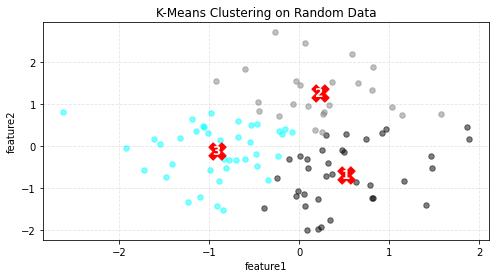

In [13]:
clustering(km, "feature1", "feature2")

In [14]:
def elbow(data):
    # K values range from 1 to 10
    k_values = range(1, 10)
    # formula for with-in cluster sum of squares
    wcss_scores = [within_cluster_sum_of_squares(data, k) for k in k_values]

    plt.figure(figsize=(8, 4))
    plt.plot(k_values, wcss_scores, '-o', color='red')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.xticks(k_values)
    plt.grid(True, ls='--', alpha=0.2, color='grey')
    plt.show()

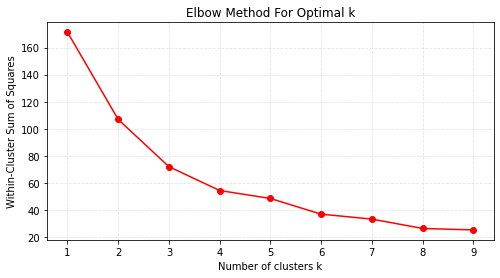

In [15]:
elbow(data)

- Doe, J. (2021, April 5). [Create Your Own K-Means Clustering Algorithm in Python](https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670). Towards Data Science.
- Smith, A. (2020, June 10). [K-Means Clustering from Scratch](https://www.askpython.com/python/examples/k-means-clustering-from-scratch). AskPython.
- Lee, K. (2019, September 15). [Clustering Analysis: K-Means and Hierarchical Clustering by Hand and in R](https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r/). Stats and R.
- Jones, B. (2022, February 28). [K-Means Clustering From Scratch](https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25). Towards Data Science.